# Basic plots of selected UPSC candidates data from _1982_ to _2019_

In [351]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn
import datetime
import numpy as np

### Data Retrieval

In [449]:
url='https://gist.githubusercontent.com/arnobbhanja/fe89888ee5cc8b528522a5f017ccc3e2/raw/5403cf207e9ef35e2bb45bd36753551b688b9611/upsc_officer_2019.csv'
data=pd.read_csv(url,index_col=0)
data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 3696 entries, 1 to 3696
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   allotment_yr  3696 non-null   int64 
 1   name          3696 non-null   object
 2   state         3696 non-null   object
 3   dob           3696 non-null   object
dtypes: int64(1), object(3)
memory usage: 144.4+ KB


### Data Manipulation

In [450]:
# custom color palette
flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]

#data cleanup
data['dob']=pd.to_datetime(data['dob'],format='%d-%m-%Y')
data['allotment_age']=data['allotment_yr']-data['dob'].dt.year
data['service']=2020-data['allotment_yr']
data['birthyear']=data['dob'].dt.year
data['pre_2000']=data['allotment_yr']<2000 # allotment before 2000
data.head(5)

,allotment_yr,name,state,dob,allotment_age,service,birthyear,pre_2000
sno,,,,,,,,
1,1982,Rajiv Gauba,JH,1959-08-15,23,38,1959,True
2,1982,Avinash K Srivastava,UP,1960-01-23,22,38,1960,True
3,1982,Sudhi Ranjan Mohanty,MP,1960-03-21,22,38,1960,True
4,1983,Keshni Anand Arora,HY,1960-09-11,23,37,1960,True
5,1983,Chandra Kishore Mishra,BH,1960-05-16,23,37,1960,True


### 1. Cumulative summary statistics of allotment age

In [385]:
print(data['allotment_age'].describe(),'\n\n')
print(data.loc[data['allotment_age']==data['allotment_age'].max(),['name','state','dob','allotment_yr','allotment_age']],'\n\n')
print('modal age of allotment : {}\n\n'.format(data['allotment_age'].mode()))

count    3696.000000
mean       26.684253
std         2.616205
min        22.000000
25%        25.000000
50%        26.000000
75%        28.000000
max        38.000000
Name: allotment_age, dtype: float64 


                    name state        dob  allotment_yr  allotment_age
2138  Himanshu Kumar Rai    BH 1972-07-10          2010             38 


modal age of allotment : 0    26
dtype: int64




### 2. Summary statistics of allotment age : pre 2000 vs post 2000(inc.)

Year 2000 is selected because around that time the max age of selection has been shifted to a higher number, and from that year, the number of selected candidates has been a monotonically increasing graph.

Also, 2000 is a good round number and turn of the millenium.

In [386]:
pre_2k=data[data['pre_2000']==True]['allotment_age']
post_2k=data[data['pre_2000']==False]['allotment_age']

print('pre 2000:\n\n',pre_2k.describe(), '\n\n', 'mode: ', pre_2k.mode(), '\n\n')
print('post 2000(inclusive) :\n\n', post_2k.describe(), '\n\n', 'mode: ', post_2k.mode())

pre 2000:

 count    1196.000000
mean       25.192308
std         1.906116
min        22.000000
25%        24.000000
50%        25.000000
75%        26.000000
max        33.000000
Name: allotment_age, dtype: float64 

 mode:  0    25
dtype: int64 


post 2000(inclusive) :

 count    2500.000000
mean       27.398000
std         2.609199
min        22.000000
25%        25.000000
50%        27.000000
75%        29.000000
max        38.000000
Name: allotment_age, dtype: float64 

 mode:  0    27
dtype: int64


### 3. Statewise Distribution of currently serving officers

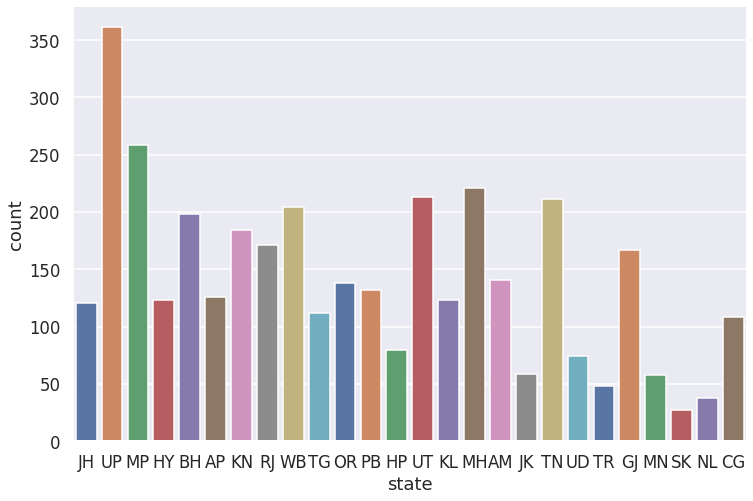

In [392]:
#using matplotlib
#plt.figure(figsize=(9,5))
#data['state'].value_counts().plot(kind='bar')

#using seaborn
sbn.set_style('darkgrid')
sbn.set_context('talk')
sbn.catplot(x='state', data=data, height=7, aspect=1.5, kind='count', palette='deep')

### 4. 'Allotment Age' wise distribution of candidates

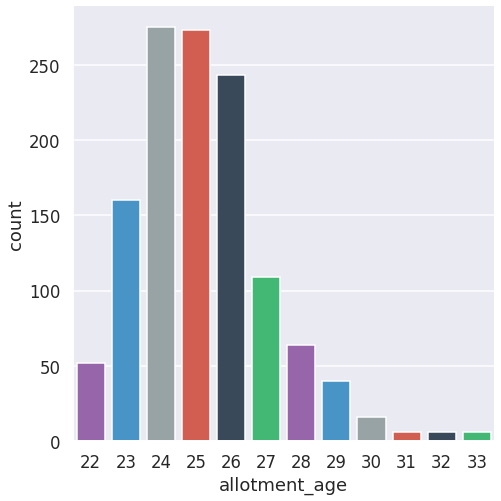

In [395]:
sbn.set_style('darkgrid')
sbn.set_context('talk')
sbn.catplot(x='allotment_age',data=data[data['allotment_yr']<=2000],height=7,aspect=1,kind='count', palette=flatui)

### 5. Yearwise Allotment Age Statistics

whiskers(8.9,88.9) == 80%

The percentile numbers 8.9 and 88.9 are chosen to closely fit the 2019 data.

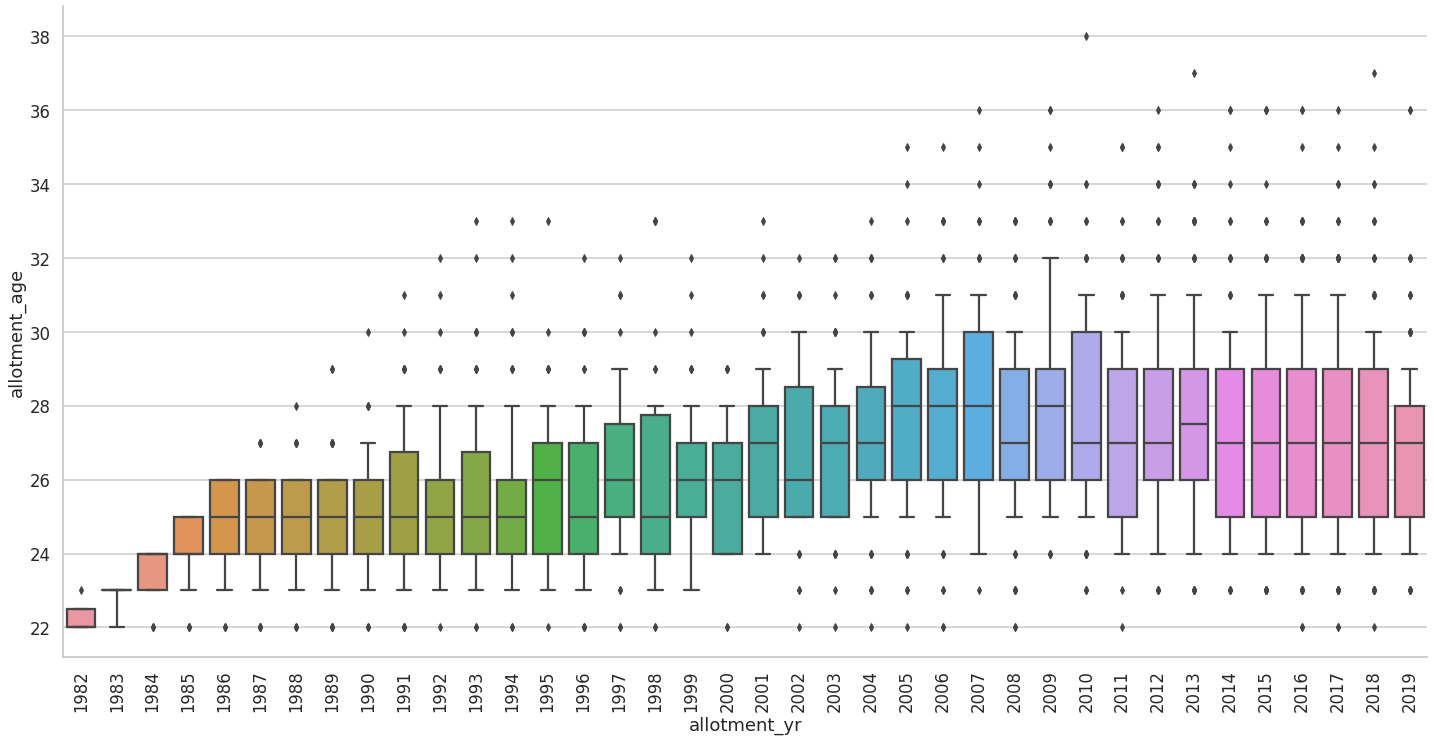

In [407]:
sbn.set_style('whitegrid')
sbn.set_context('talk')
ax=sbn.catplot(x='allotment_yr',y='allotment_age',kind='box', data=data,height=10, aspect = 2,whis=[8.9,88.9]) # whisker range=80%
ax.set_xticklabels(rotation=90)

### 6. Number of candidates selected each year

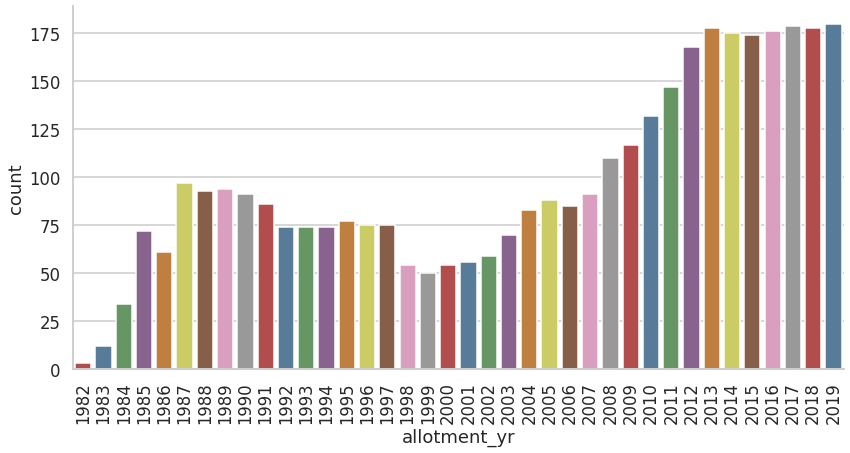

In [427]:
sbn.set_style('whitegrid')
sbn.set_context('talk')
ax=sbn.catplot(x='allotment_yr',data=data,kind='count', height=6, aspect=2, palette='Set1', saturation=0.5)
ax.set_xticklabels(rotation='90')

### 7. Allotment age wise plots with year 2000 as the breaking point

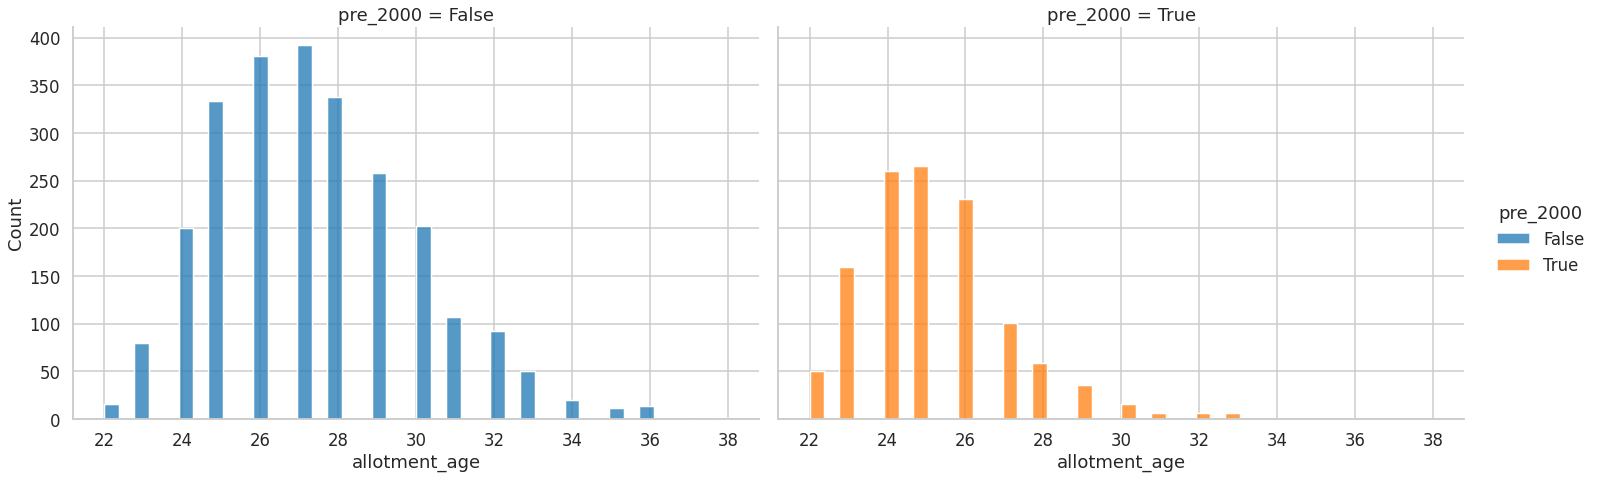

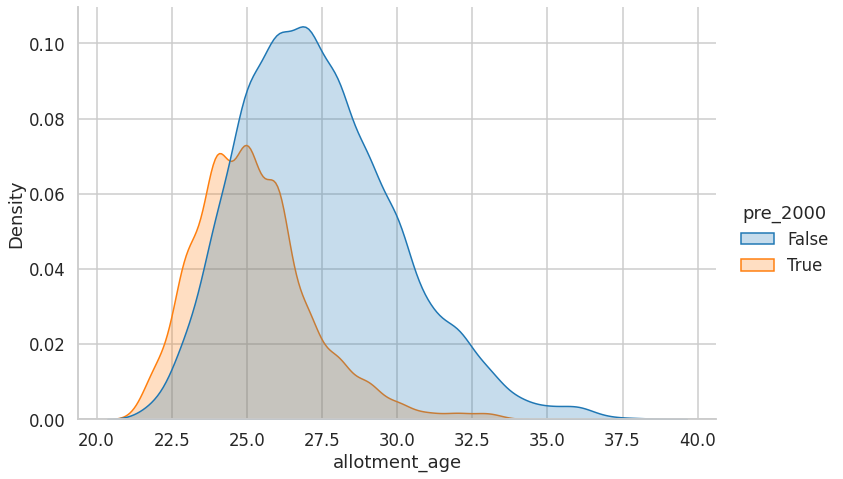

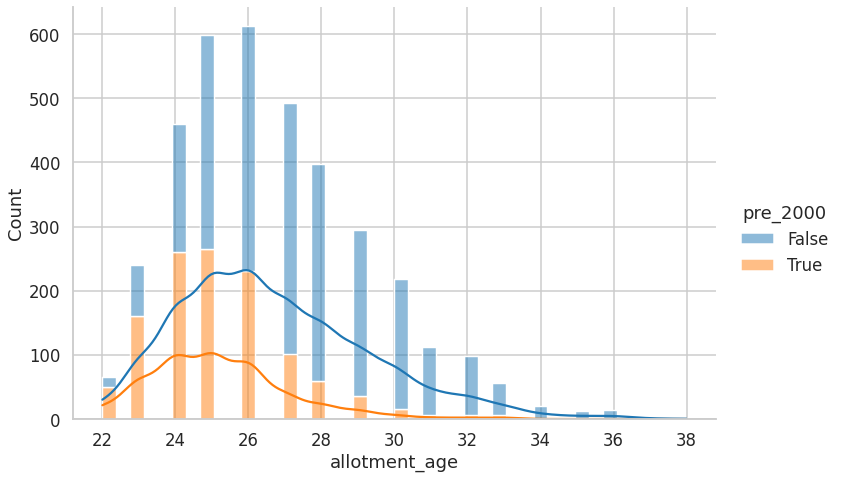

In [428]:
# Plot_1 : allotment_age vs. count of candidates.
sbn.displot(x='allotment_age', data=data, height=7,aspect=1.5, hue='pre_2000', col='pre_2000', multiple='dodge')

# plot_2 : a different graph trying to convey the same message as above in a single plot.
sbn.displot(data=data, x="allotment_age", height=7,aspect=1.5, hue='pre_2000',kind="kde", fill=True)

# plot_3 : cumulative age wise statistics with pre 2000 and post 2000(inc.) distribution
sbn.displot(x='allotment_age', data=data, height=7,aspect=1.5, hue='pre_2000',  multiple='stack', kde=True, fill=True)

### 8. A joint plot of a 'kindof' heatmap of yearwise distribution of candidates by their age

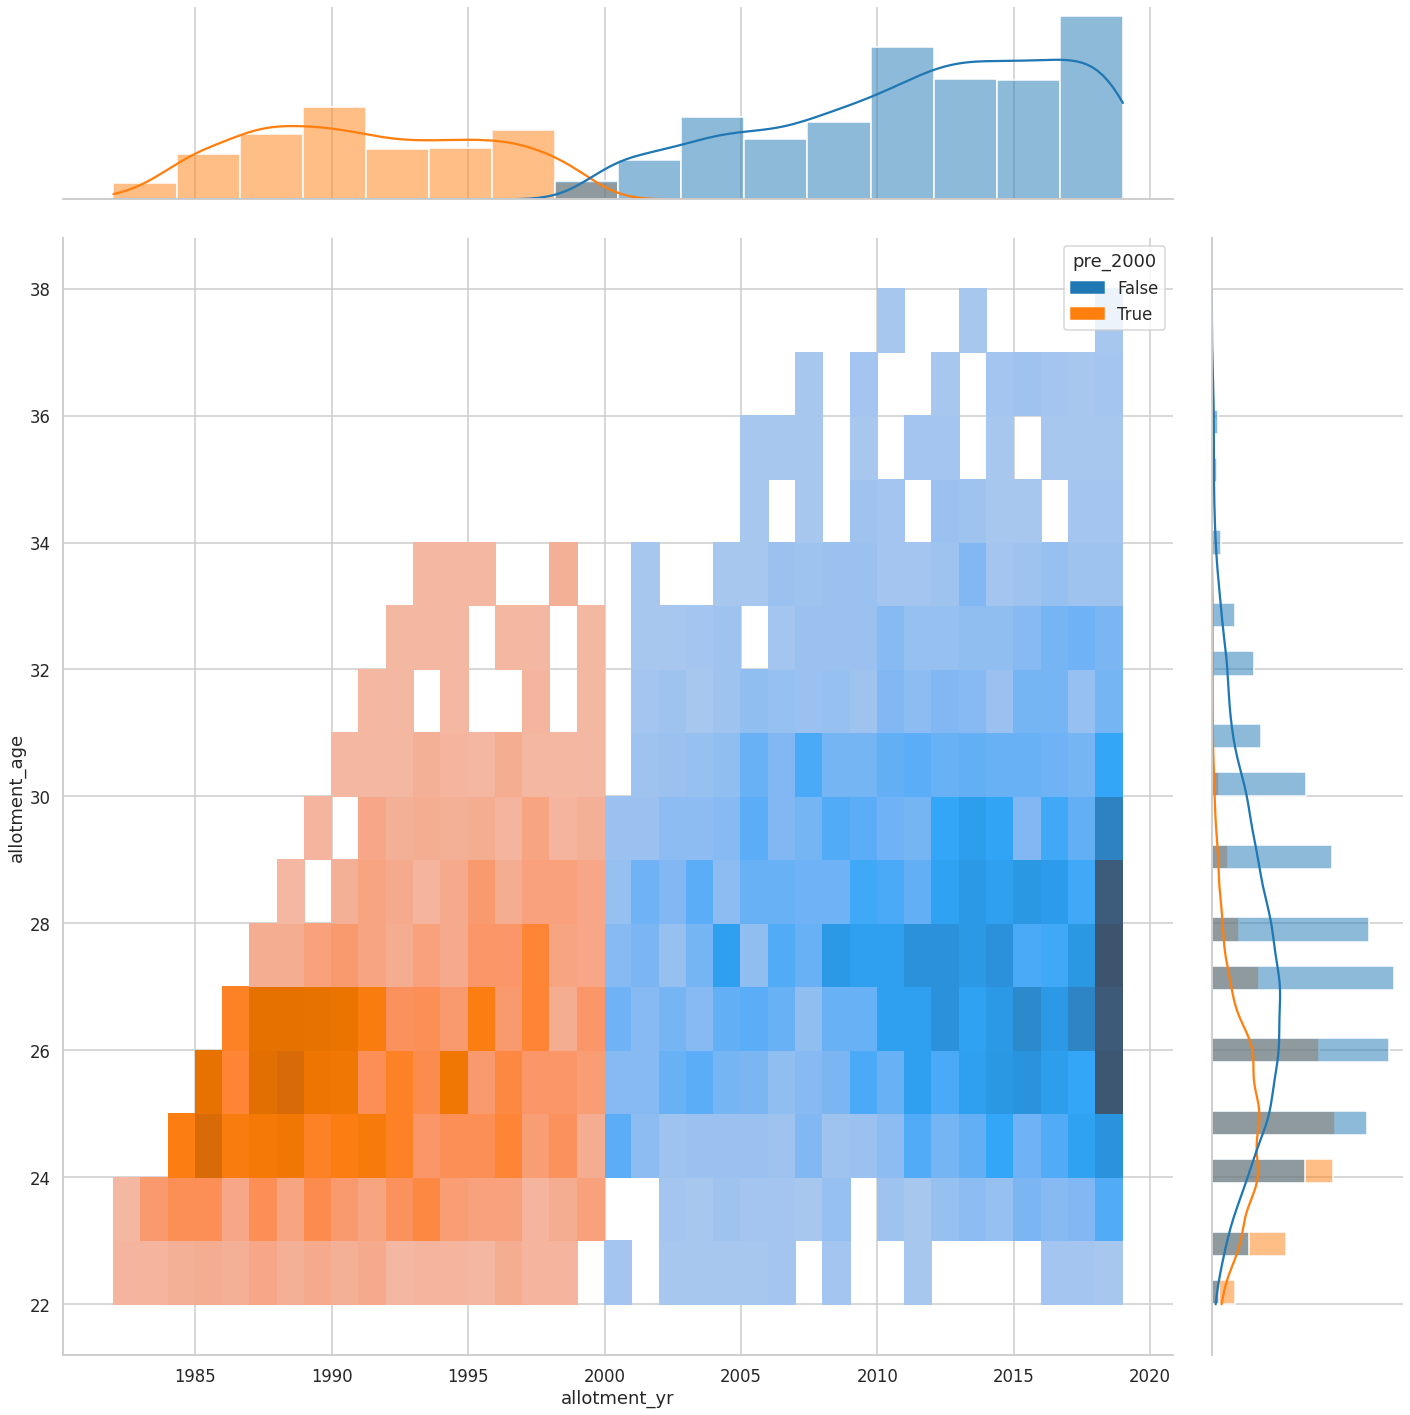

In [431]:
jplot = sbn.JointGrid(data=data, x="allotment_yr", y="allotment_age",  height=20, hue='pre_2000')
jplot.plot_joint(sbn.histplot, binwidth=(1,1))
jplot.plot_marginals(sbn.histplot, kde=True)

### 9. Count of currently serving candidates vs. their years of service

It's a direct inverse correlation of _'count of candidate per allotment year'_ plot.

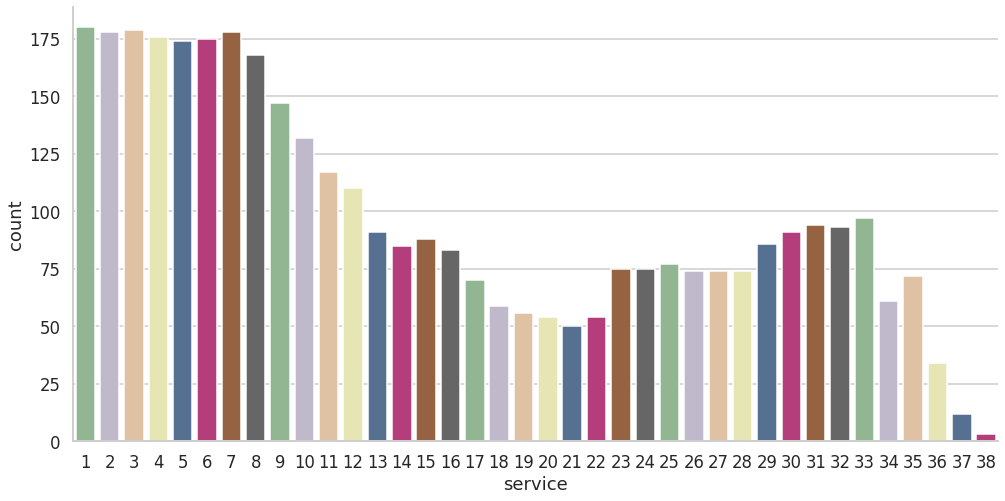

In [440]:
sbn.set_context('talk')
sbn.catplot(x='service', kind='count', data=data, height=7, aspect=2, palette='Accent', saturation=0.5)

### 10. _Allotment year_ and _Years of service_ plots of candidates born on or after _1993_

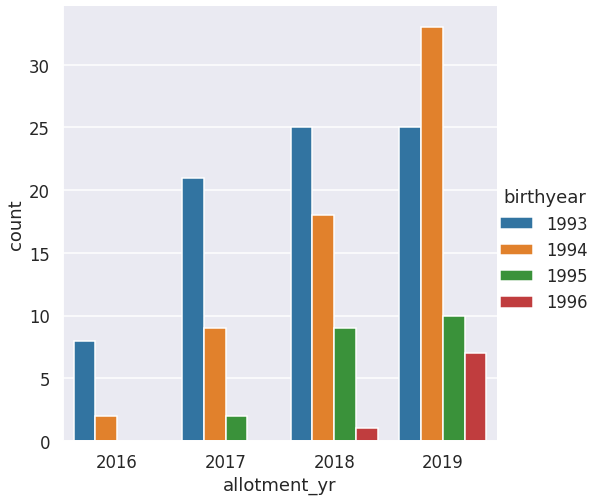

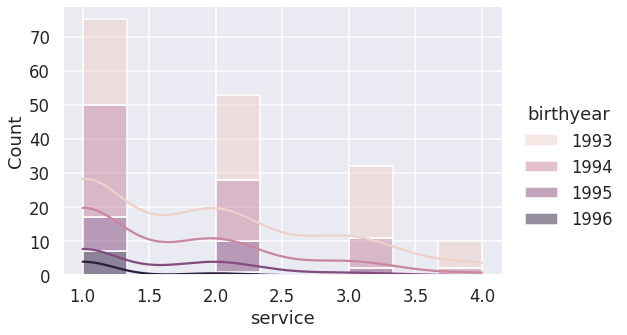

In [461]:
from_93=data[data['birthyear']>=1993]
from_93.head(5)

# plot_1 : number of candidates selected year
sbn.catplot(x='allotment_yr', kind='count', data=from_93, height=7, aspect=1, hue='birthyear')
sbn.displot(x='service', data=from_93, height=5,aspect=1.5, hue='birthyear',  multiple='stack', kde=True, fill=True)